<a href="https://colab.research.google.com/github/venysssssssssss/Predictions_Regression_for_Car_Mileage_and_Diamond_Price/blob/main/predictions_regression_for_car_mileage_and_diamond_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Suprima os avisos
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [ ]:
# Carregue o conjunto de dados MPG
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/mpg.csv"
df = pd.read_csv(URL)

# Mostre 5 amostras aleatórias do conjunto de dados
print(df.sample(5))

# Calcule a forma do DataFrame
print(df.shape)

      MPG  Cylinders  Engine Disp  Horsepower  Weight  Accelerate  Year  \
328  46.6          4         86.0          65    2110        17.9    80   
139  26.0          4        116.0          75    2246        14.0    74   
63   28.0          4         98.0          80    2164        15.0    72   
196  18.0          6        250.0          78    3574        21.0    76   
87   14.0          8        304.0         150    3672        11.5    73   

       Origin  
328  Japanese  
139  European  
63   American  
196  American  
87   American  
(392, 8)


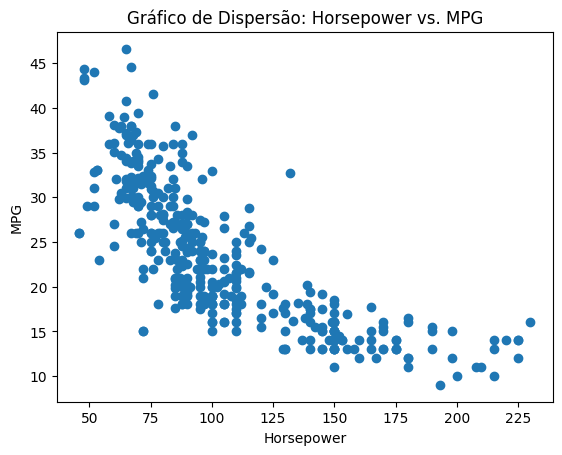

In [ ]:
# Plote um gráfico de dispersão
plt.scatter(df["Horsepower"], df["MPG"])
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Gráfico de Dispersão: Horsepower vs. MPG")
plt.show()

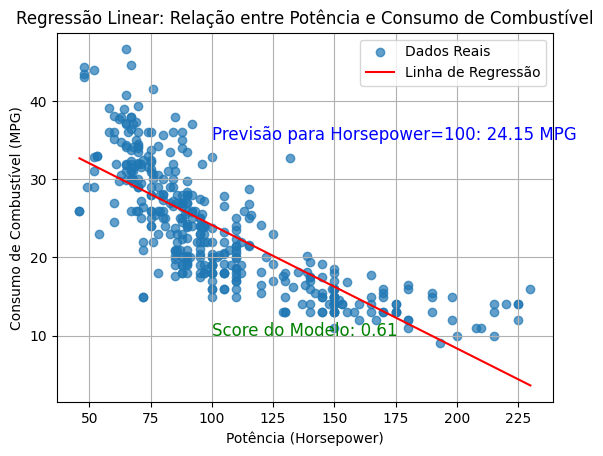

In [ ]:
import numpy as np

# Crie um conjunto de dados de exemplo para a regressão
x = df["Horsepower"]  # Variável independente (Potência)
y = df["MPG"]         # Variável dependente (Consumo de Combustível)

# Treine um modelo de regressão linear
lr = LinearRegression()
lr.fit(x.values.reshape(-1, 1), y)

# Faça previsões para o conjunto de dados de exemplo
x_pred = np.linspace(x.min(), x.max(), 100)  # Valores de Horsepower para previsão
y_pred = lr.predict(x_pred.reshape(-1, 1))   # Valores previstos de MPG

# Plote os dados reais e a linha de regressão
plt.scatter(x, y, label="Dados Reais", alpha=0.7)
plt.plot(x_pred, y_pred, color='red', label="Linha de Regressão")
plt.xlabel("Potência (Horsepower)")
plt.ylabel("Consumo de Combustível (MPG)")
plt.title("Regressão Linear: Relação entre Potência e Consumo de Combustível")
plt.legend()

# Explicação adicional
plt.text(100, 10, f"Score do Modelo: {lr.score(x.values.reshape(-1, 1), y):.2f}", fontsize=12, color='green')
plt.text(100, 35, f"Previsão para Horsepower=100: {lr.predict([[100]])[0]:.2f} MPG", fontsize=12, color='blue')

plt.grid(True)
plt.show()


In [ ]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diamonds.csv"
df2 = pd.read_csv(URL2)

# Crie variáveis de destino e recursos para o segundo conjunto de dados
target2 = df2["price"]
features2 = df2[["carat", "depth"]]

# Treine um segundo modelo de regressão linear
lr2 = LinearRegression()
lr2.fit(features2, target2)

# Avalie o segundo modelo
score2 = lr2.score(features2, target2)
print(f"Score do Modelo 2: {score2}")

# Faça uma previsão usando o segundo modelo
prediction2 = lr2.predict([[0.3, 60]])
print(f"Previsão para carat=0.3 e depth=60: {prediction2}")

Score do Modelo 2: 0.8506754571636563
Previsão para carat=0.3 e depth=60: [244.95605225]


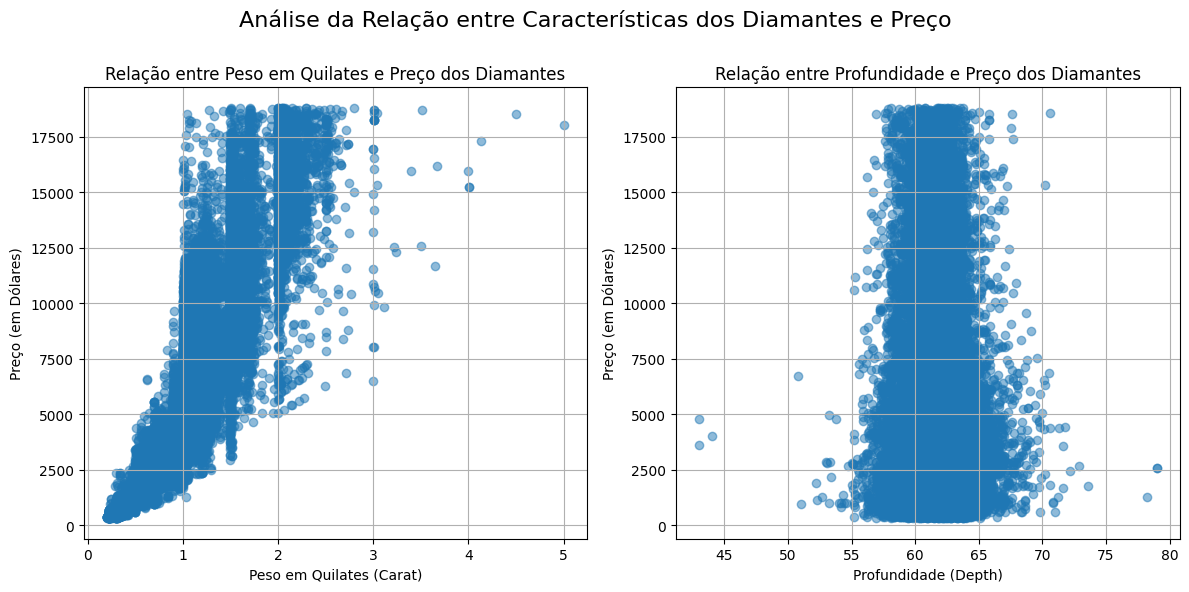

In [ ]:
import matplotlib.pyplot as plt

# Plote um gráfico de dispersão para "carat" em relação ao preço
plt.figure(figsize=(12, 6))  # Aumentamos o tamanho da figura para uma melhor visualização
plt.subplot(1, 2, 1)
plt.scatter(df2["carat"], df2["price"], alpha=0.5)
plt.xlabel("Peso em Quilates (Carat)")
plt.ylabel("Preço (em Dólares)")
plt.title("Relação entre Peso em Quilates e Preço dos Diamantes")
plt.grid(True)  # Adicionamos uma grade para melhor leitura

# Plote um gráfico de dispersão para "depth" em relação ao preço
plt.subplot(1, 2, 2)
plt.scatter(df2["depth"], df2["price"], alpha=0.5)
plt.xlabel("Profundidade (Depth)")
plt.ylabel("Preço (em Dólares)")
plt.title("Relação entre Profundidade e Preço dos Diamantes")
plt.grid(True)  # Adicionamos uma grade para melhor leitura

plt.tight_layout()
plt.suptitle("Análise da Relação entre Características dos Diamantes e Preço", fontsize=16)
plt.subplots_adjust(top=0.85)  # Ajustamos a posição do título principal
plt.show()


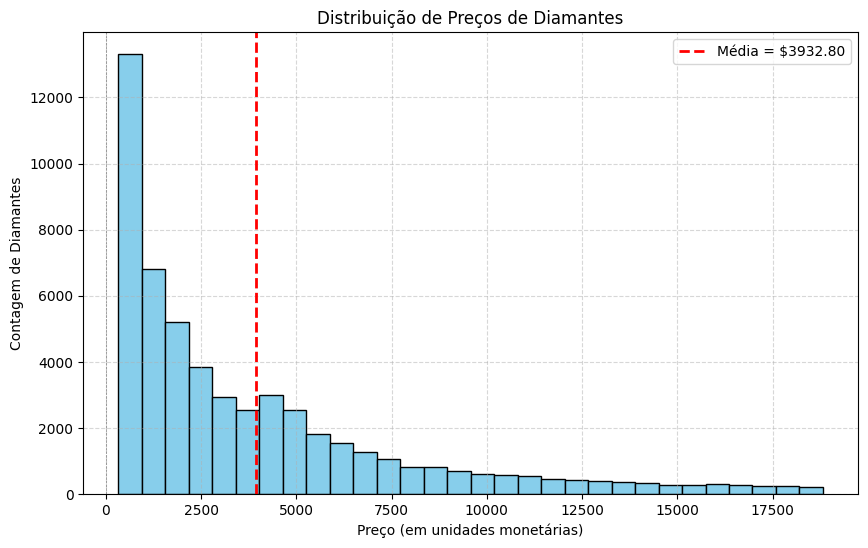

In [ ]:
# Importe a biblioteca matplotlib
import matplotlib.pyplot as plt

# Crie um histograma da distribuição de preços dos diamantes
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Plote o histograma com bordas pretas para destacar as barras
plt.hist(df2["price"], bins=30, edgecolor='k', color='skyblue')

# Adicione rótulos aos eixos x e y
plt.xlabel("Preço (em unidades monetárias)")  # Adicione a unidade monetária apropriada, se aplicável
plt.ylabel("Contagem de Diamantes")
plt.title("Distribuição de Preços de Diamantes")  # Adicione um título descritivo ao gráfico

# Adicione grades de referência horizontal para facilitar a leitura
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)

# Adicione uma linha vertical para mostrar a média de preços
mean_price = df2["price"].mean()
plt.axvline(x=mean_price, color='red', linestyle='--', linewidth=2, label=f'Média = ${mean_price:.2f}')

# Adicione uma legenda para identificar a média
plt.legend()

# Personalize o gráfico com mais detalhes, como cores, transparência, etc.
plt.grid(True, linestyle='--', alpha=0.5)

# Mostre o gráfico
plt.show()
